**Online Retail Dataset:**

* Online retail is a transactional data collection comprising all transactions for a UK-based and registered online retail non-store between 01/12/2010 and 09/12/2011. The business primarily offers distinctive all-occasion gifts. Many of the firm's clients are wholesalers.
* The size of this dataset is about 541909 rows and 8 columns (invoice number, Stock code, Description, Quantity, Invoice date, Unit price, Customer ID).

In [3]:
## Importing all the essential libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [4]:
## Loading the dataset

df = pd.read_csv('retail_data.csv', encoding='latin')

In [5]:
df.head() #1st 5 records

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom


In [6]:
df.tail() #returns last 5 records

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12-09-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12-09-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12-09-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12-09-2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12-09-2011 12:50,4.95,12680.0,France


**DataSet Understabding**

**Attribute Information:**

* **InvoiceNo:** Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.
* **StockCode:** Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
* **Description:** Product (item) name. Nominal.
* **Quantity:** The quantities of each product (item) per transaction. Numeric.
* **InvoiceDate:** Invice date and time. Numeric. The day and time when a transaction was generated.
* **UnitPrice:** Unit price. Numeric. Product price per unit in sterling (Â£).
* **CustomerID:** Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.
* **Country:** Country name. Nominal. The name of the country where a customer resides.

In [7]:
df.shape

(541909, 8)

In [8]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [9]:
#For getting all the columns
for column in df.columns:
    print(column)

InvoiceNo
StockCode
Description
Quantity
InvoiceDate
UnitPrice
CustomerID
Country


In [10]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [11]:
df.dtypes ## datatypes of all columns

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [12]:
df.info() #gives all info about the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [13]:
## Checking missing values
df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

In [14]:
(df.isnull().sum()/len(df)*100).sort_values(ascending=False)  ## % of missing values

CustomerID     24.926694
Description     0.268311
InvoiceNo       0.000000
StockCode       0.000000
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
Country         0.000000
dtype: float64

In [15]:
df = df.dropna()

In [16]:
df.shape

(406829, 8)

In [17]:
df['Description'] = df['Description'].str.lower()

In [18]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom


In [19]:
## Converting customer_id(float type) to integer type

df['CustomerID'] = df['CustomerID'].astype('int64') 

In [20]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


* **As we can see, quantity is negative. This has to be seen later as these values should ideally be positive in nature. Assuming that quantity should not be negative we will just remove the "-" sign from the quantity value.**

In [21]:
df['Quantity'] = df['Quantity'].astype(str).str.replace('-', '').astype(int)

In [22]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,13.412279,3.460471,15287.690570
std,248.624170,69.315162,1713.600303
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [23]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int32
InvoiceDate     object
UnitPrice      float64
CustomerID       int64
Country         object
dtype: object

In [24]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [25]:
df["Year"] = (df["InvoiceDate"]).dt.year
df["Month"] = (df["InvoiceDate"]).dt.month
df["Day"] = (df["InvoiceDate"]).dt.dayofweek
df["Time"] = df["InvoiceDate"].dt.strftime('%H:%M')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Time
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,12,2,08:26
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,2,08:26
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,12,2,08:26
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,2,08:26
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,2,08:26


* **In Pandas, the day format starts from 0 to 6, i.e. Monday=0, Tuesday=1,.....Sunday=6**

In [26]:
df['Day_Name'] = df['InvoiceDate'].dt.day_name()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Time,Day_Name
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,12,2,08:26,Wednesday
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,2,08:26,Wednesday
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,12,2,08:26,Wednesday
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,2,08:26,Wednesday
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,2,08:26,Wednesday


**Segregate day column as weekend or weekday**

In [27]:
df["IsWeekend"] = (df["Day"] >= 5).astype(int)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Time,Day_Name,IsWeekend
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,12,2,08:26,Wednesday,0
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,2,08:26,Wednesday,0
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,12,2,08:26,Wednesday,0
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,2,08:26,Wednesday,0
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,2,08:26,Wednesday,0


**RFM Analysis**
- RFM (Recency, Frequency, Monetary) analysis is a customer segmentation technique that uses past purchase behavior to divide customers into groups. RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.

- **Recency(R)**: Days since last purchase
- **Frequency(F)**: Total number of purchases
- **Monetory value(M)**: Total money this customer spent.

#### Adding new Features Amount_Spent(Monetory value), Frequency and Recency.

In [28]:
df['Amount_Spent'] = df['Quantity']* df['UnitPrice']

In [29]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Time,Day_Name,IsWeekend,Amount_Spent
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,12,2,08:26,Wednesday,0,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,2,08:26,Wednesday,0,20.34


In [30]:
## Calculating Monetary
rfm_m = df.groupby('CustomerID')['Amount_Spent'].sum().reset_index().rename(columns={'Amount_Spent':'Monetary'})
rfm_m.head()

,CustomerID,Monetary
0,12346,154367.20
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40


In [31]:
## Calculating Frequency.
rfm_f = df.groupby('CustomerID')['InvoiceNo'].count().reset_index().rename(columns= {'InvoiceNo':'Frequency'})
rfm_f.head()

,CustomerID,Frequency
0,12346,2
1,12347,182
2,12348,31
3,12349,73
4,12350,17


In [32]:
rfm = pd.merge(rfm_m, rfm_f, on='CustomerID', how='inner')
rfm.head()

,CustomerID,Monetary,Frequency
0,12346,154367.20,2
1,12347,4310.00,182
2,12348,1797.24,31
3,12349,1757.55,73
4,12350,334.40,17


In [33]:
# Compute the maximum date to know the last transaction date
max_date = max(df['InvoiceDate'])

# Compute the difference between max date and transaction date
df['Diff'] = max_date - df['InvoiceDate']

# Compute last transaction date to get the recency of customers
rfm_p = df.groupby('CustomerID')['Diff'].min().reset_index()

## Extract number of days only
rfm_p['Diff'] = rfm_p['Diff'].dt.days 

rfm = pd.merge(rfm, rfm_p, on='CustomerID', how='inner')

In [34]:
rfm = rfm.rename(columns={'Diff':'Recency'})
rfm.head()

,CustomerID,Monetary,Frequency,Recency
0,12346,154367.20,2,325
1,12347,4310.00,182,1
2,12348,1797.24,31,74
3,12349,1757.55,73,18
4,12350,334.40,17,309


**Calculating RFM score**
* RFM score is calculated based upon recency, frequency, monetary value normalize ranks. Based upon this score we divide our customers. Here we rate them on the scale of 5. Formula used for calculating **rfm score is : 0.15*Recency score + 0.28*Frequency score + 0.57 *Monetary score.**

In [35]:
# Rank each metric R , F & M
rfm['R_rank'] = rfm['Recency'].rank( ascending=False)
rfm['F_rank'] = rfm['Frequency'].rank(ascending=True)
rfm['M_rank'] = rfm['Monetary'].rank(ascending=True)

# normalize each rank with Max rank
rfm['R_rank_norm']  = (rfm['R_rank']/rfm['R_rank'].max())*100
rfm['F_rank_norm']  = (rfm['F_rank']/rfm['F_rank'].max())*100
rfm['M_rank_norm']  = (rfm['F_rank']/rfm['M_rank'].max())*100
rfm.head()

# Now apply our equation and create final score **Consolidated Score = 0.15*R_rank_norm + 0.28*F_rank_norm + 0.57M_rank_norm**
rfm['RFM_Score'] = 0.15*rfm['R_rank_norm']+0.28*rfm['F_rank_norm']+0.57*rfm['M_rank_norm']
rfm['RFM_Score'] *= 0.05
rfm = rfm.round(2)
#rfm = rfm.round(0)
rfm.head()

,CustomerID,Monetary,Frequency,Recency,R_rank,F_rank,M_rank,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score
0,12346,154367.20,2,325,167.0,109.0,4367.0,3.87,2.49,2.49,0.13
1,12347,4310.00,182,1,4221.5,3847.0,4021.0,97.72,87.99,87.99,4.47
2,12348,1797.24,31,74,1649.5,1829.0,3338.0,38.18,41.83,41.83,2.06
3,12349,1757.55,73,18,3152.5,2898.0,3315.0,72.97,66.29,66.29,3.36
4,12350,334.40,17,309,241.0,1082.5,1235.0,5.58,24.76,24.76,1.09


* **Rating Customer based upon the RFM score**
* rfm score >4.5 : Top Customer
* 4.5 > rfm score > 4 : High Value Customer
* 4>rfm score >3 : Medium value customer
* 3>rfm score>1.6 : Low-value customer
* rfm score<1.6 :Lost Customer

In [36]:
rfm["Customer_segment"] = np.where(rfm['RFM_Score'] >4.5, "Top Customers",
                             (np.where(rfm['RFM_Score'] > 4, "High value Customer",
                             (np.where(rfm['RFM_Score'] > 3,"Medium Value Customer",
                             np.where(rfm['RFM_Score'] > 1.6,'Low Value Customers', 'Lost Customers'))))))
rfm.head()

,CustomerID,Monetary,Frequency,Recency,R_rank,F_rank,M_rank,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Customer_segment
0,12346,154367.20,2,325,167.0,109.0,4367.0,3.87,2.49,2.49,0.13,Lost Customers
1,12347,4310.00,182,1,4221.5,3847.0,4021.0,97.72,87.99,87.99,4.47,High value Customer
2,12348,1797.24,31,74,1649.5,1829.0,3338.0,38.18,41.83,41.83,2.06,Low Value Customers
3,12349,1757.55,73,18,3152.5,2898.0,3315.0,72.97,66.29,66.29,3.36,Medium Value Customer
4,12350,334.40,17,309,241.0,1082.5,1235.0,5.58,24.76,24.76,1.09,Lost Customers


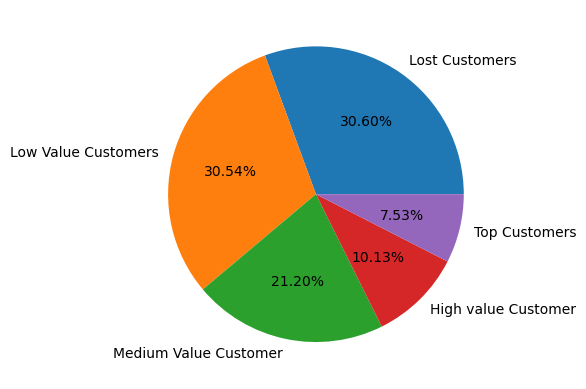

In [44]:
customer_seg = rfm['Customer_segment'].value_counts().index
customer_val = rfm['Customer_segment'].value_counts().values

plt.pie(customer_val, labels = customer_seg, autopct = '%1.2f%%')
plt.show()

* **High Value Customer:** They are your loyal customers.So provide constant support via customer service
* **Medium Value Customer:** Send them personalized emails with offers and encourage them to shop more
* **Low Value Customer:** These customers are about to churn or went into a dormant stage,apply reactivation strategies for them